In [20]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras import Sequential
from keras.datasets import mnist
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from matplotlib import pyplot as plt
from keras import backend as K

NUM_OF_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10
# input image dimensions
IMG_ROWS, IMG_COLS = 28, 28

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, NUM_OF_CLASSES)
y_test = to_categorical(y_test, NUM_OF_CLASSES)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

K.image_data_format()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, IMG_ROWS, IMG_COLS)
    x_test = x_test.reshape(x_test.shape[0], 1, IMG_ROWS, IMG_COLS)
    input_shape = (1, IMG_ROWS, IMG_COLS)
else:
    x_train = x_train.reshape(x_train.shape[0], IMG_ROWS, IMG_COLS, 1)
    x_test = x_test.reshape(x_test.shape[0], IMG_ROWS, IMG_COLS, 1)
    input_shape = (IMG_ROWS, IMG_COLS, 1)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


In [22]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_OF_CLASSES, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [23]:
opt = keras.optimizers.Adadelta() 
loss = keras.losses.categorical_crossentropy

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 101s 215ms/step - loss: 2.2860 - accuracy: 0.1454 - val_loss: 2.2491 - val_accuracy: 0.3533
Epoch 2/12
469/469 [==============================] - 95s 202ms/step - loss: 2.2275 - accuracy: 0.2598 - val_loss: 2.1776 - val_accuracy: 0.4663
Epoch 3/12
469/469 [==============================] - 86s 184ms/step - loss: 2.1524 - accuracy: 0.3538 - val_loss: 2.0804 - val_accuracy: 0.5548
Epoch 4/12
469/469 [==============================] - 88s 187ms/step - loss: 2.0516 - accuracy: 0.4286 - val_loss: 1.9523 - val_accuracy: 0.6294
Epoch 5/12
469/469 [==============================] - 83s 176ms/step - loss: 1.9204 - accuracy: 0.4928 - val_loss: 1.7863 - val_accuracy: 0.6961
Epoch 6/12
469/469 [==============================] - 83s 176ms/step - loss: 1.7600 - accuracy: 0.5417 - val_loss: 1.5863 - val_accuracy: 0.7499
Epoch 7/12
469/469 [==============================] - 84s 178ms/step - loss: 1.5841 - accuracy: 0.5854 - val_loss: 1.3755 - val_a

In [24]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 2.3067 - accuracy: 0.0779


[2.306662082672119, 0.0778999999165535]

In [25]:
CLASS_NAMES = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(CLASS_NAMES)

preds = model.predict(x_test)

preds_single = CLASS_NAMES[np.argmax(preds, axis = -1)]
actual_single = CLASS_NAMES[np.argmax(y_test, axis = -1)]

[0 1 2 3 4 5 6 7 8 9]


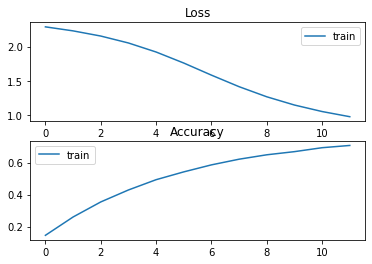

In [26]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()

# plot mse during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.legend()
plt.show()

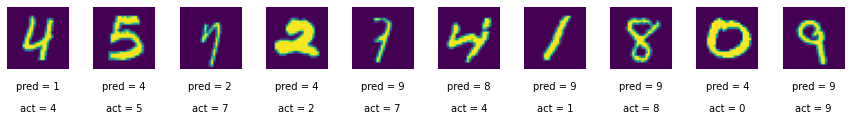

In [27]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)